# ***深度学习基础***

# QA
----
## **1. dropout作用是什么**
### Dropout可以作为训练深度神经网络的一种trick供选择。在每个训练批次中，通过忽略一半的特征检测器（让一半的隐层节点值为0），可以明显地减少过拟合现象。这种方式可以减少特征检测器（隐层节点）间的相互作用，检测器相互作用是指某些检测器依赖其他检测器才能发挥作用。Dropout说的简单一点就是：我们在前向传播的时候，让某个神经元的激活值以一定的概率p停止工作，这样可以使模型泛化性更强，因为它不会太依赖某些局部的特征。

-----

## **2. 谈谈dropout为什么有效？**
### dropout的思想继承自bagging方法。对神经元做选择从而得到结构上有所区别的网络，类似于bagging中选择部分数据训练多个学习器，最后都是对多个学习器的结果集成，都是起到提高泛化性能抑制过拟合的作用。
### 有论文说明了dropout是贝叶斯模型的近似，但是我没读懂。。。总之这一块不是很懂


----

## **3. 谈一下LSTM与GRU的异同**
### GRU和LSTM都是基础的RNN的变体，最大的相似之处就是， 在从t 到 t-1 的更新时都引入了加法，使得网络状态具有更好的传递性。这个加法的好处在于能防止梯度弥散，因此LSTM和GRU都比一般的RNN效果更好。性能在很多任务上不分伯仲。
### GRU 参数更少因此更容易收敛，但是数据集很大的情况下，LSTM表达性能更好。
### 从结构上来说，GRU只有两个门（update和reset），LSTM有三个门（forget，input，output），GRU直接将hidden state 传给下一个单元，而LSTM则用memory cell 把hidden state 包装起来。

----

## **4.CNN具备怎样的特性，为什么对于视觉信号处理这么有效？**
### CNN特征不需要人工设计，只需要给数据，可以当成黑匣子使用，适合用于比较复杂，难以人工设计特征的任务。总体来说，人工设计特征物理意义明确，有明确的意义，而CNN特征可以处理无法手动设计特征，或者场景较复杂的任务，从而利用大量的数据来训练较好的特征。同时，CNN共享卷积核，完成相同任务适用的参数也较少，收敛速度更快。

----

## **5. dropout层和激活层的顺序应该怎么设计，为什么？**
### 似乎一般都是先激活层再dropout的，但是没有找到详细的解释。

----
## **6. 401的tsne可视化的启示**
### tsne可视化是一种降维方法，将高维坐标集合映射到低维，以反映分布间差异程度的相对熵作为目标函数，通过动量的梯度下降进行优化。在点与点关系的衡量上采用了概率分布的形式，相对knn采用的切比雪夫距离能够更好的反映数据的局部特征。这里用tsne是一种方法，当然也可以用其他的方式，比如pca，总之最关键的是通过对最后一层网络参数和训练结果的关系进行可视化分析，可以较直观地地感知到网络分类的过程。




----

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
x0 = torch.randint(low=0, high=2, size=(1000,1))
x1 = torch.randint(low=0, high=2, size=(1000,1))
# x2 = torch.randint(low=0, high=2, size=(1000,1))
# x3 = torch.randint(low=0, high=2, size=(1000,1))
# x4 = torch.randint(low=0, high=2, size=(1000,1))
y = torch.tensor((x0 == x1) , dtype=int)
y = torch.tensor([1 if i == 0 else 0 for i in y])

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [3]:
torch.cuda.is_available()

False

In [4]:
torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
x = torch.cat((x0, x1), 1).type(torch.FloatTensor) 
x, y = Variable(x), Variable(y)
x.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)   

    def forward(self, x):
        x = F.relu(self.hidden(x))     
        x = self.out(x)
        return x

In [ ]:
net = Net(n_feature=2, n_hidden=100, n_output=2)    
print(net)  


optimizer = torch.optim.SGD(net.parameters(), lr=0.02, momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=2, bias=True)
)


In [ ]:
x

tensor([[1., 0.],
        [0., 1.],
        [0., 0.],
        ...,
        [1., 0.],
        [1., 1.],
        [1., 0.]])

In [ ]:
y

tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

----

In [74]:
out = net(x)                
loss = loss_func(out, y)     
optimizer.zero_grad()   
loss.backward()        
optimizer.step()
_,xx = torch.max(F.softmax(out), 1)
xx

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [79]:
F.softmax(out)

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.0223, 0.9777],
        [0.0228, 0.9772],
        [0.9805, 0.0195],
        ...,
        [0.0223, 0.9777],
        [0.9734, 0.0266],
        [0.0223, 0.9777]], grad_fn=<SoftmaxBackward>)

D:\programs\envs\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


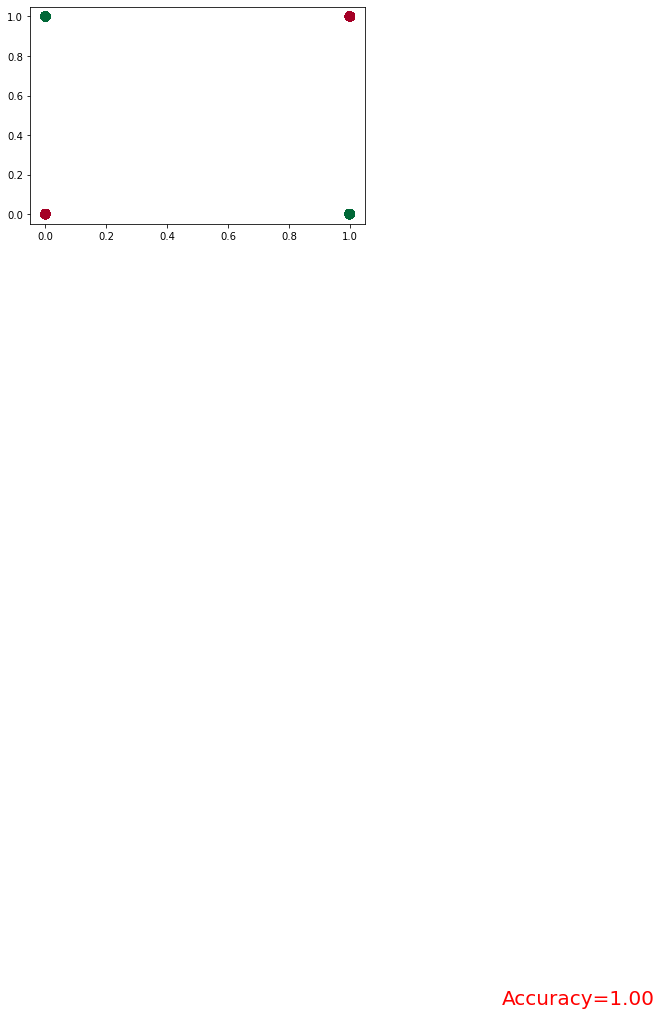

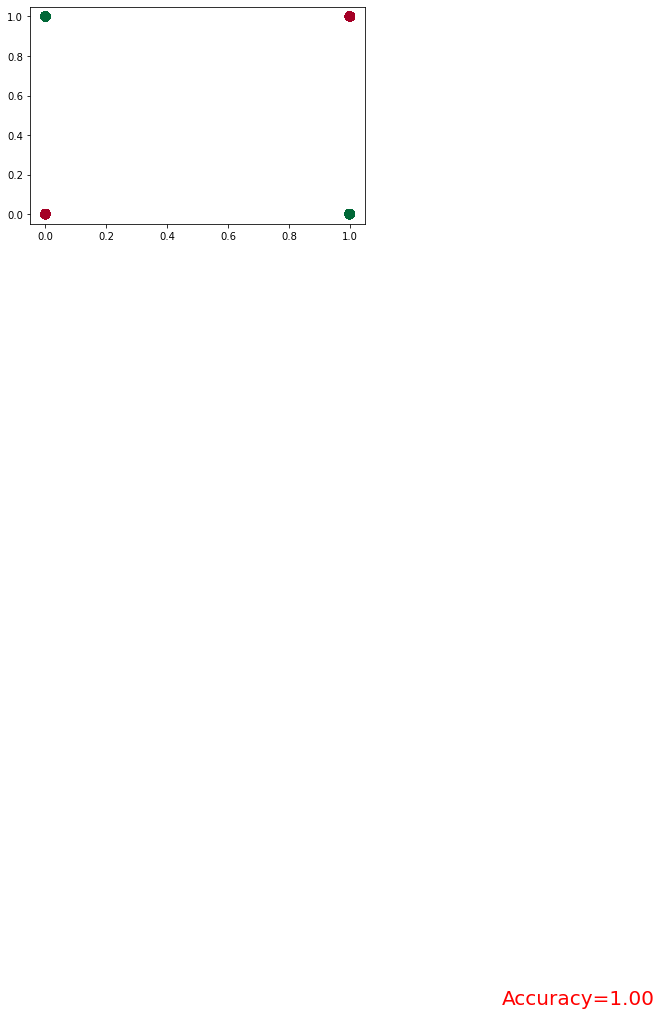

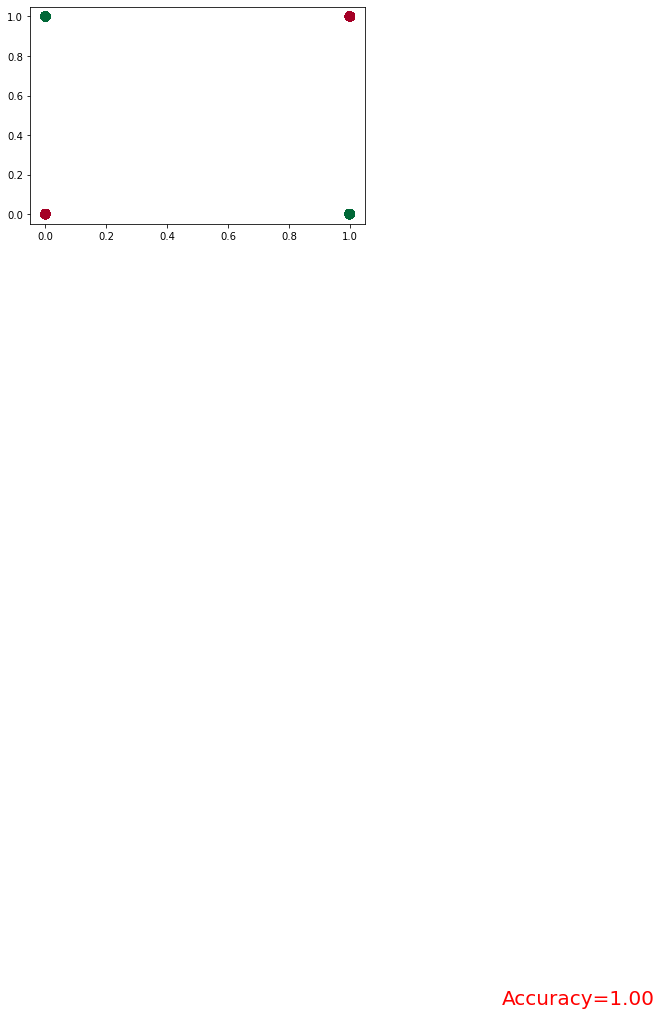

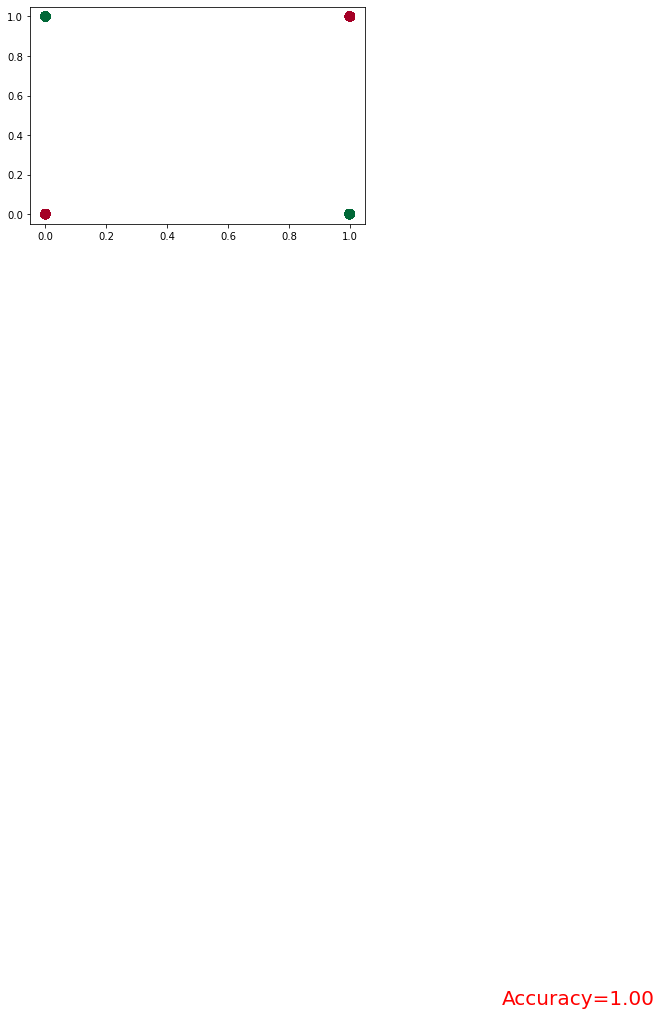

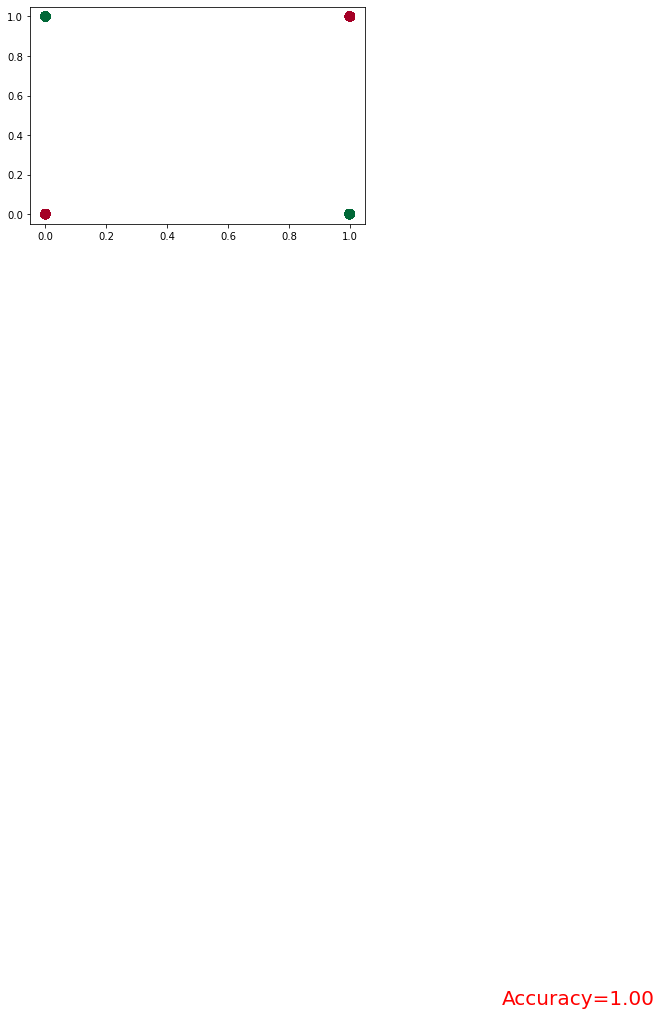

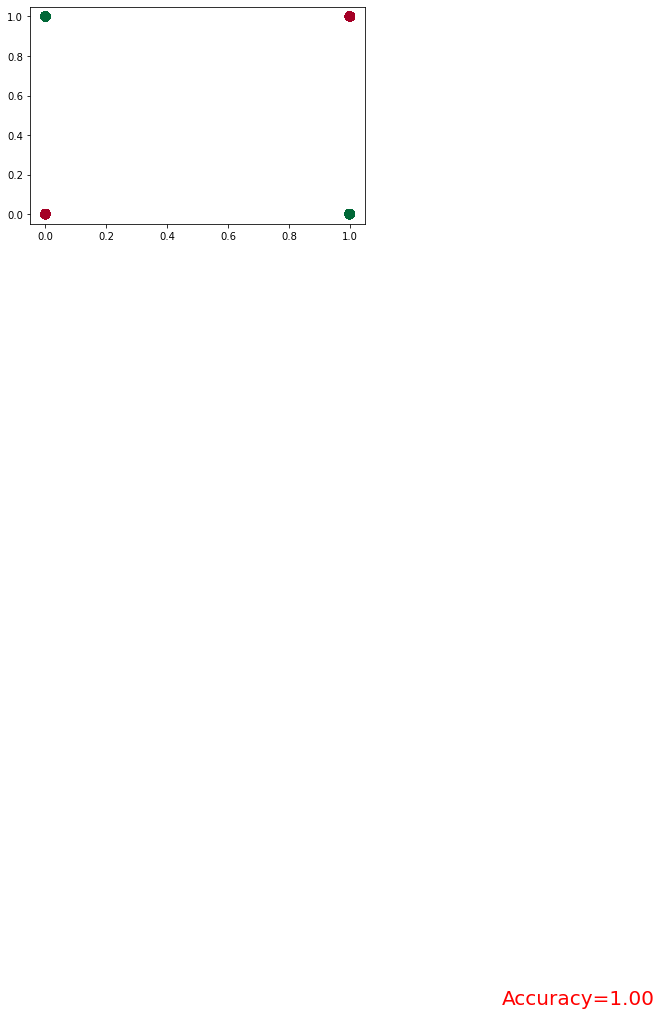

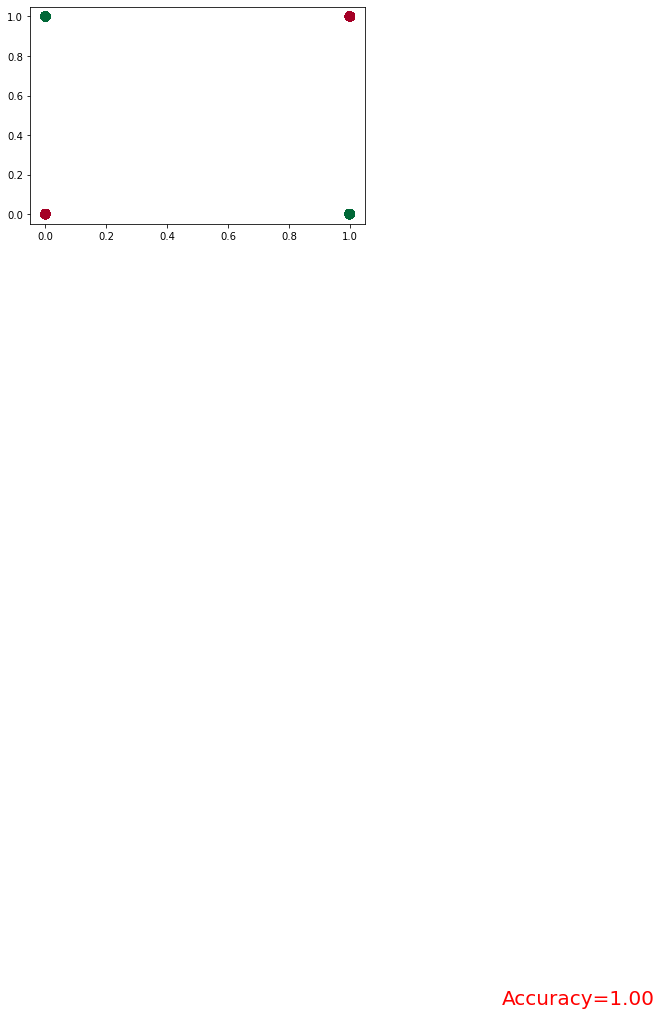

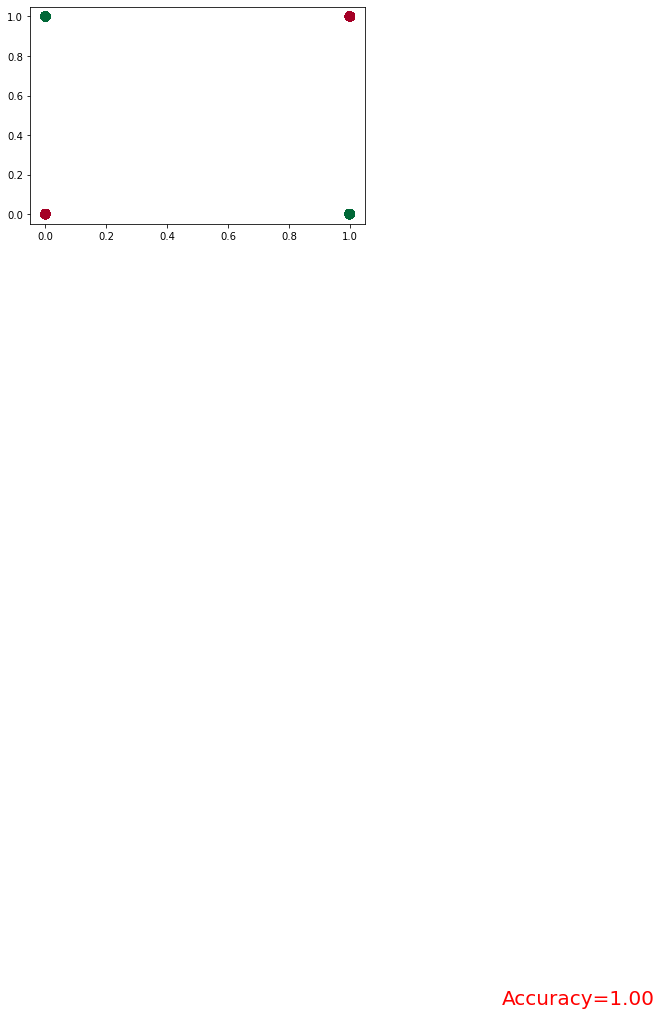

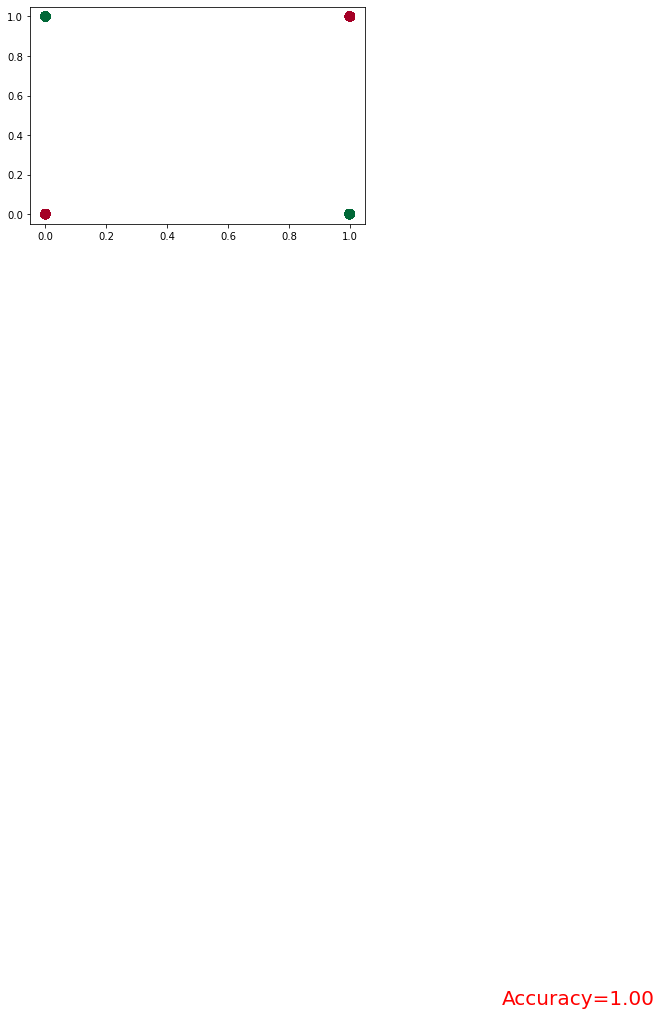

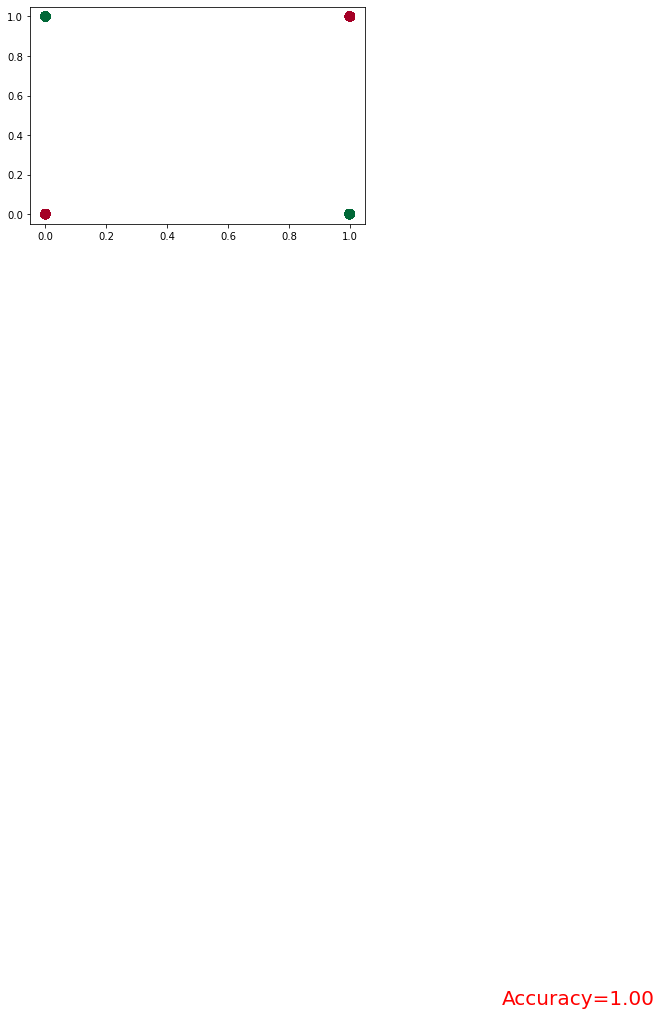

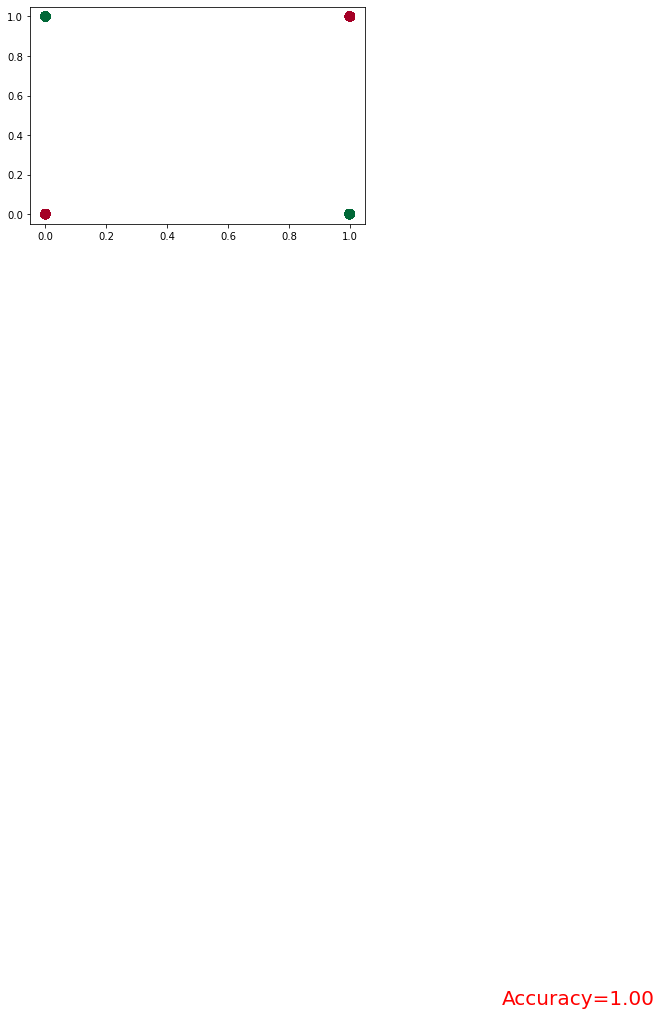

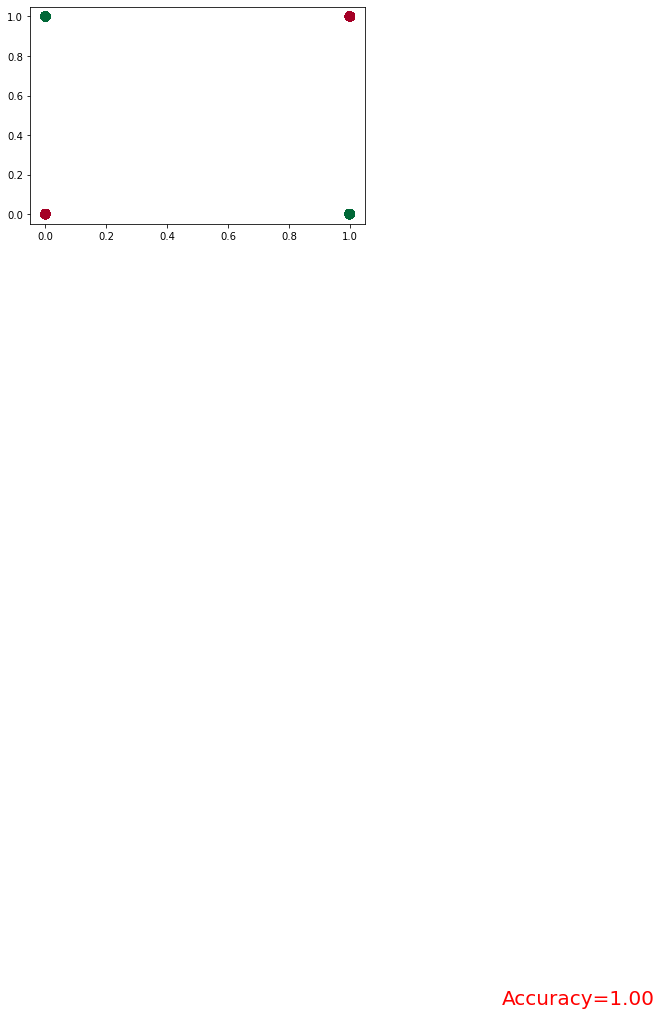

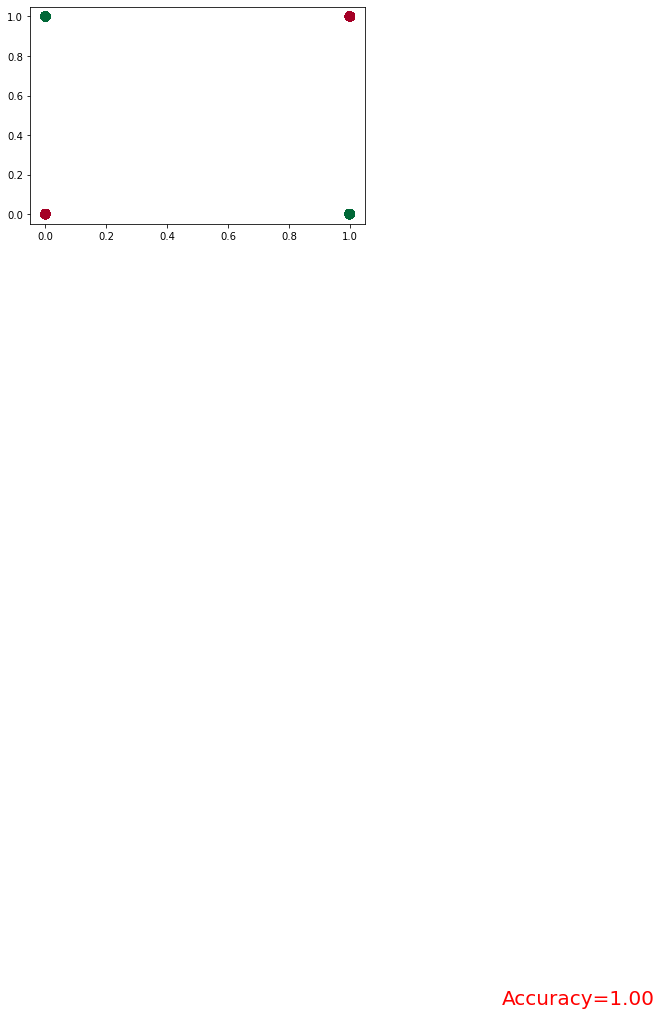

In [76]:

for t in range(40):
    out = net(x)                
    loss = loss_func(out, y)     
    optimizer.zero_grad()   
    loss.backward()        
    optimizer.step()       
    t+=1
    if t % 3 == 0:
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/1000.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)


In [77]:
torch.save(net, 'net.pkl')

D:\programs\envs\python36\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [78]:
torch.restore

AttributeError: module 'torch' has no attribute 'restore'